In [1]:
import torch
from torch import nn

import torchvision
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# Setup training data
train_data = datasets.FashionMNIST(
    root="data/FashionMNIST", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data/FashionMNIST",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

Image size: torch.Size([1, 28, 28])
Label: 0, label size: torch.Size([])


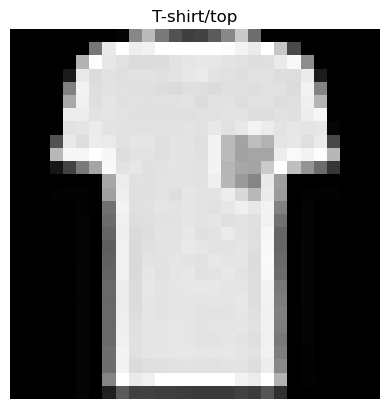

In [7]:
import visualization.visualizationTool as visTool

image,label=train_data[0]
image.shape,label
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)
visTool.showImageByElementOfDataset(train_data[0],style='gray')
class_names = train_data.classes

from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")